### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-23,391981,3891760,602837,507109,231847,128291,127352,128719,111024,90620,80748,101947,83329,4846,190906
2021-06-24,393310,3900372,603178,509141,232068,128312,127362,129278,111068,90685,80766,102636,83473,4846,191073
2021-06-25,394493,3909654,603744,511142,232346,128330,127418,129869,111101,90752,80779,103321,83588,4847,191447
2021-06-26,395751,3917118,603891,512735,232521,128353,127458,130479,111113,90761,80779,104014,83711,4846,191447
2021-06-27,396730,3923066,603966,513474,232564,128364,127472,131070,111130,90768,80779,104678,83845,4846,191584


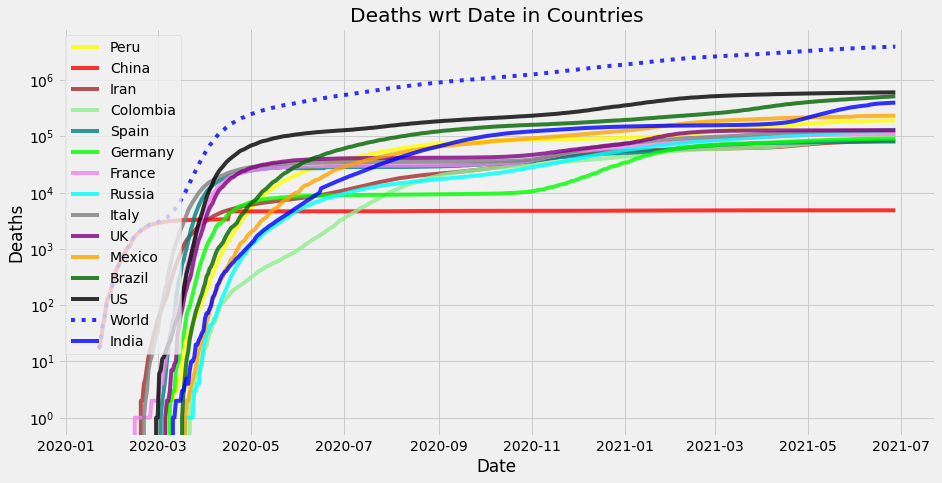

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-23,54069,437255,12436,115228,4963,15943,1140,17303,2330,1135,4341,29995,11059,18,2995
2021-06-24,51667,403837,12830,73602,5340,16705,266,19871,2151,475,4507,32997,11734,31,2843
2021-06-25,48698,421740,23715,79277,5270,15374,751,20065,1988,751,4924,32733,10820,29,6813
2021-06-26,50040,362819,7303,64134,5051,17946,838,21312,2128,488,0,33594,7034,16,0
2021-06-27,46148,309453,3484,33704,2384,14633,780,20169,1578,336,0,32376,9758,28,2795


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-23,106945,417264,15726,70396,3087,7693,2342,12965,3071,2867,4205,25499,10179,24,3604
2021-06-24,103259,416369,15532,70609,3237,8294,2203,13426,3010,2708,4225,25999,10283,24,3554
2021-06-25,99622,416727,16078,71187,3372,8766,2106,13868,2942,2577,4271,26448,10319,24,3771
2021-06-26,96316,413133,15493,70717,3484,9378,2022,14365,2887,2438,3987,26924,10100,24,3519
2021-06-27,92972,406221,14692,68249,3411,9728,1939,14751,2800,2298,3721,27288,10077,24,3471


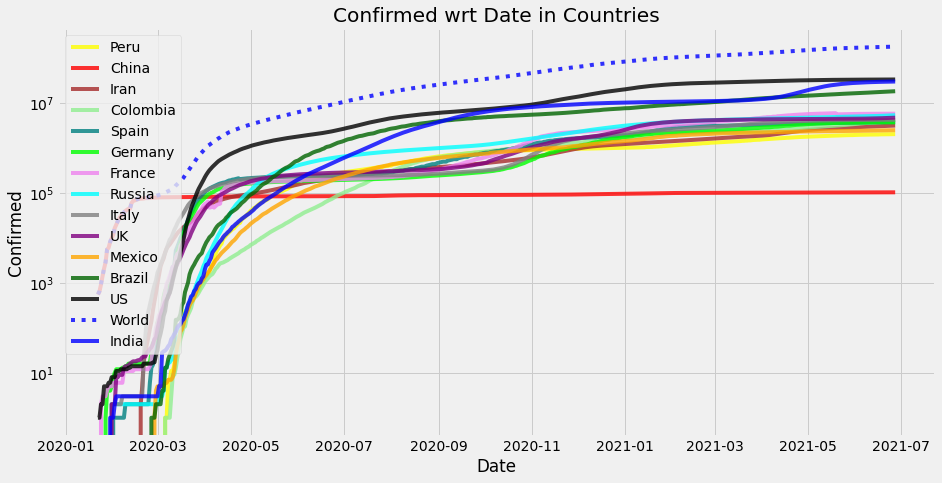

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-23,1321,9523,375,2392,342,19,30,539,33,67,29,645,112,0,261
2021-06-24,1329,8612,341,2032,221,21,10,559,44,65,18,689,144,0,167
2021-06-25,1183,9282,566,2001,278,18,56,591,33,67,13,685,115,1,374
2021-06-26,1258,7464,147,1593,175,23,40,610,12,9,0,693,123,-1,0
2021-06-27,979,5948,75,739,43,11,14,591,17,7,0,664,134,0,137


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-23,2108.53,9187.06,329.43,1921.88,215.28,12.55,43.25,437.54,49.95,76.42,27.74,605.34,131.62,0.00,261.19
2021-06-24,2011.09,9115.18,330.88,1935.65,216.00,13.61,39.10,452.73,49.21,74.99,26.52,615.80,133.16,0.00,249.42
2021-06-25,1907.58,9136.03,360.27,1943.82,223.75,14.16,41.21,470.01,47.18,73.99,24.83,624.45,130.89,0.13,264.99
2021-06-26,1826.38,8927.03,333.61,1899.96,217.66,15.26,41.06,487.51,42.78,65.87,21.73,633.02,129.91,-0.02,231.87
2021-06-27,1720.46,8554.65,301.28,1754.84,195.82,14.73,37.68,500.45,39.56,58.51,19.01,636.89,130.42,-0.01,220.01


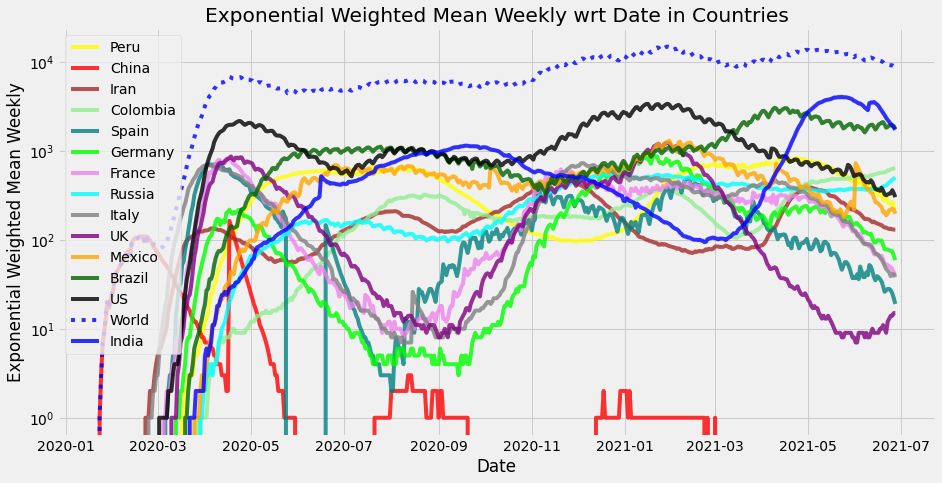

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

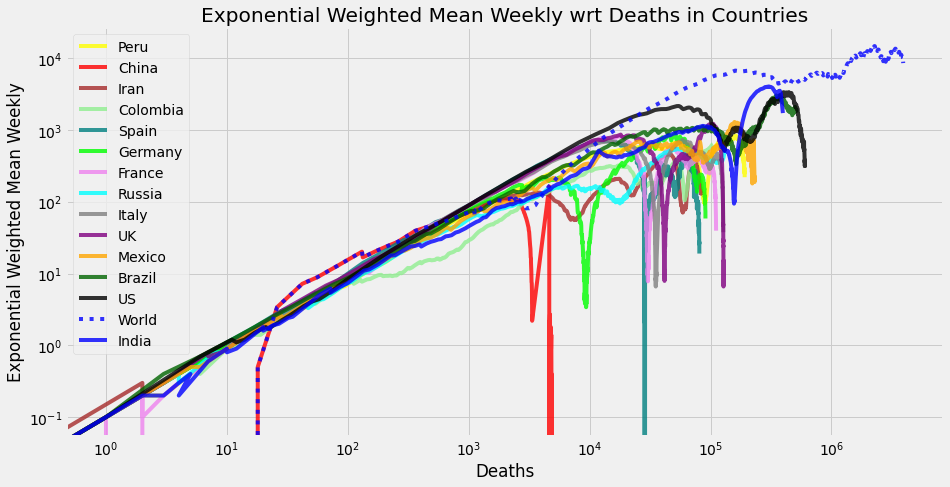

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

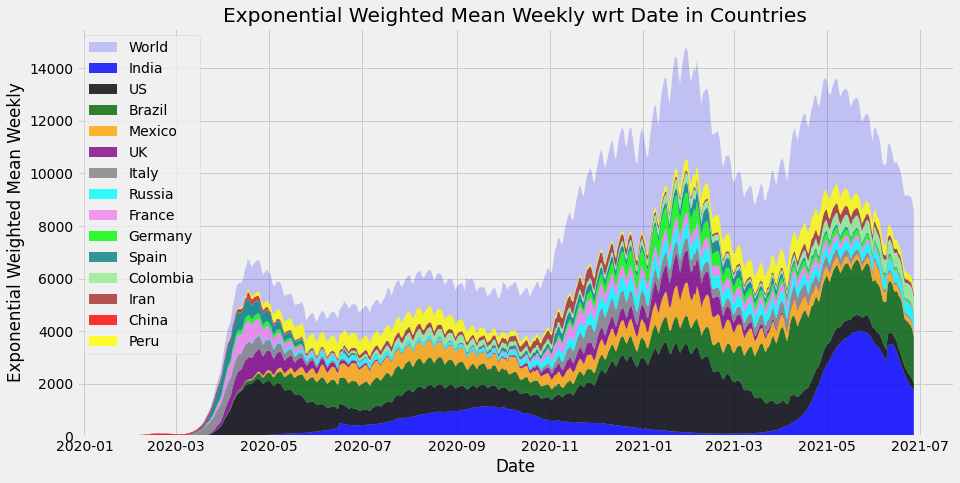

In [20]:
stackplotter(AVG, name)

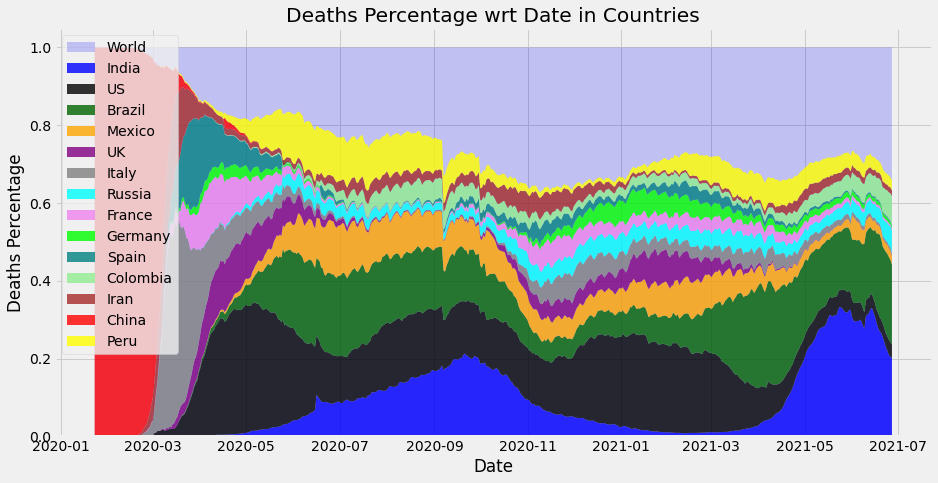

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

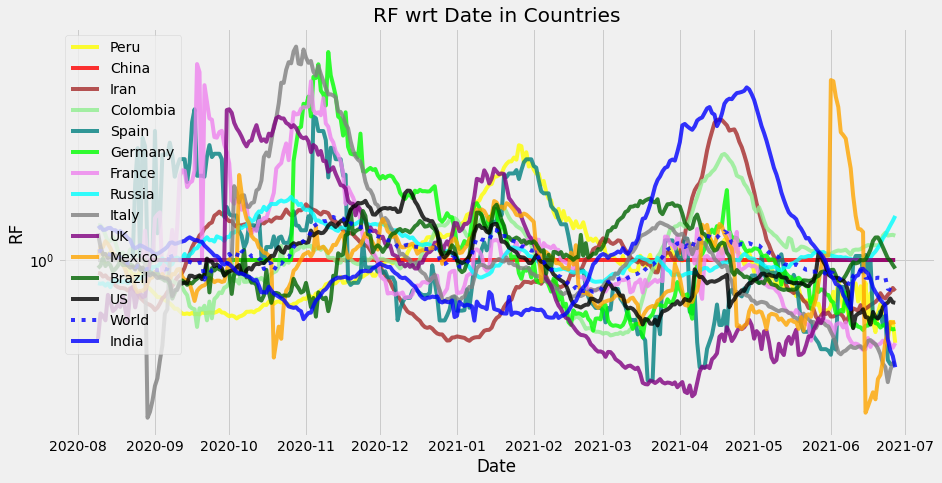

In [23]:
plotter(Reproductivity[200:], 'RF')

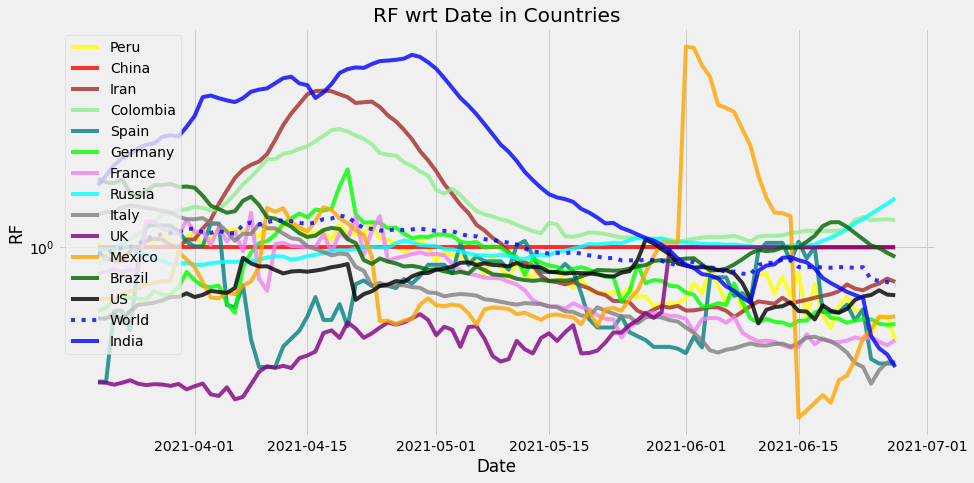

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

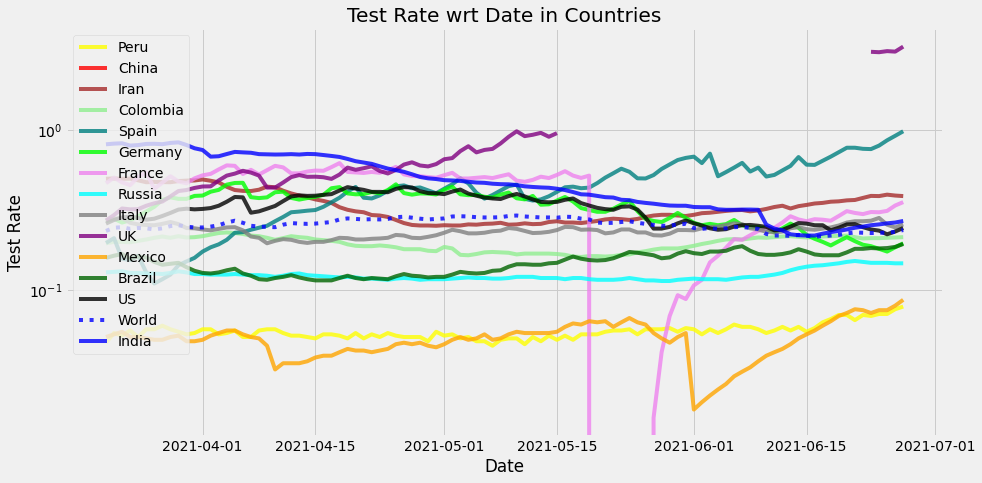

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

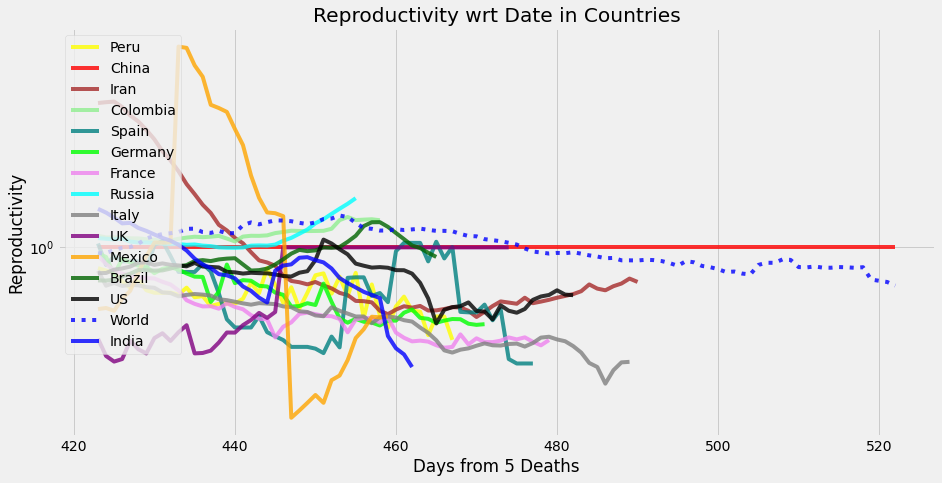

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

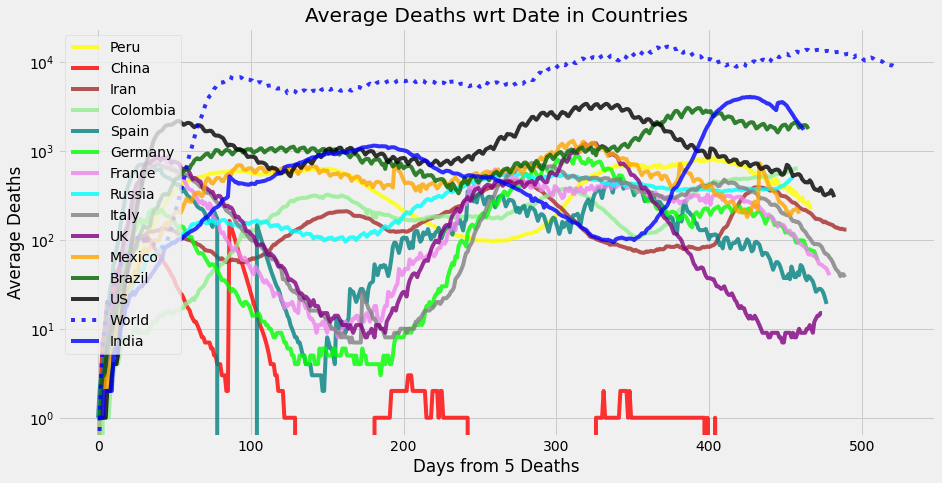

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

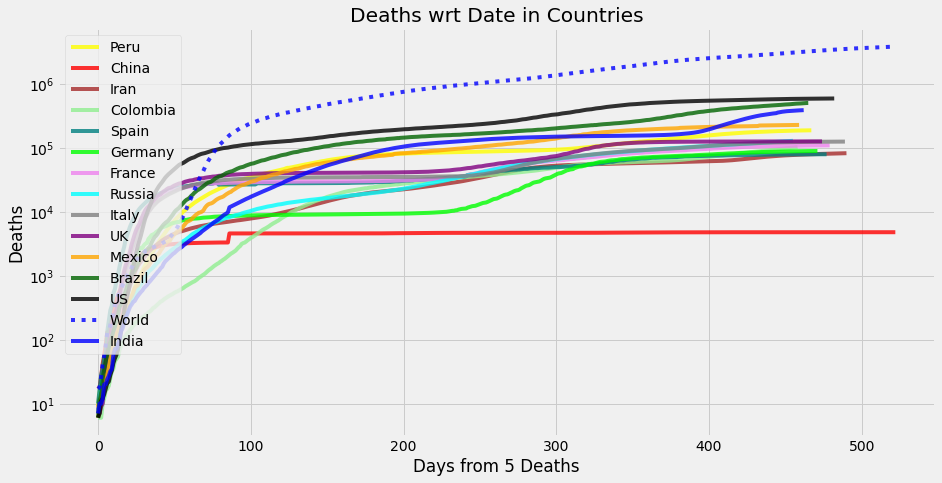

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3923066,5948,8126.71,8554.65,0.7953,181093400,0.237,406221,784.61
US,603966,75,306.00,301.28,0.7508,33624983,0.244,14692,120.79
Brazil,513474,739,1664.14,1754.84,0.9446,18420598,0.194,68249,102.69
India,396730,979,1227.86,1720.46,0.4878,30279331,0.270,92972,79.35
Mexico,232564,43,196.71,195.82,0.6609,2505792,0.087,3411,46.51
Peru,191584,137,197.43,220.01,0.5743,2046057,0.079,3471,38.32
Russia,131070,591,552.00,500.45,1.3437,5387486,0.147,14751,26.21
UK,128364,11,17.71,14.73,1.0000,4748644,3.302,9728,25.67
Italy,127472,14,28.86,37.68,0.5032,4258069,0.257,1939,25.49


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3923066,5948,8126.71,8554.65,0.7953,181093400,0.237,406221,784.61
Brazil,513474,739,1664.14,1754.84,0.9446,18420598,0.194,68249,102.69
India,396730,979,1227.86,1720.46,0.4878,30279331,0.270,92972,79.35
Colombia,104678,664,677.71,636.89,1.1771,4158716,0.214,27288,20.94
Russia,131070,591,552.00,500.45,1.3437,5387486,0.147,14751,26.21
Argentina,92568,251,503.57,486.19,0.9176,4405247,0.228,22132,18.51
Indonesia,57138,409,353.71,311.18,1.7938,2115304,0.196,12168,11.43
US,603966,75,306.00,301.28,0.7508,33624983,0.244,14692,120.79
Peru,191584,137,197.43,220.01,0.5743,2046057,0.079,3471,38.32


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  3923066


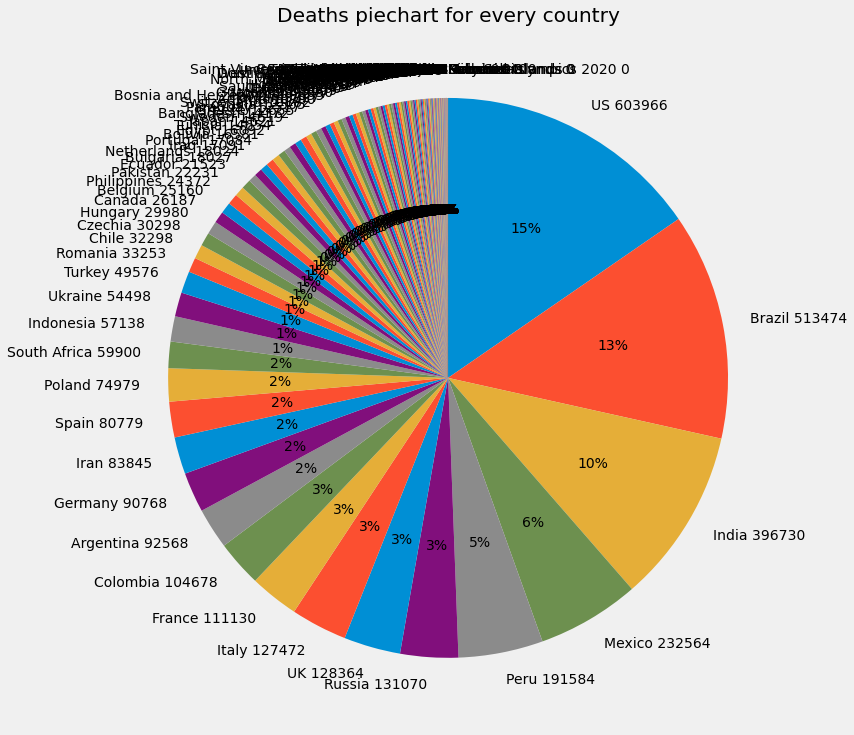

In [35]:
piechart('Deaths')

World total:  8126


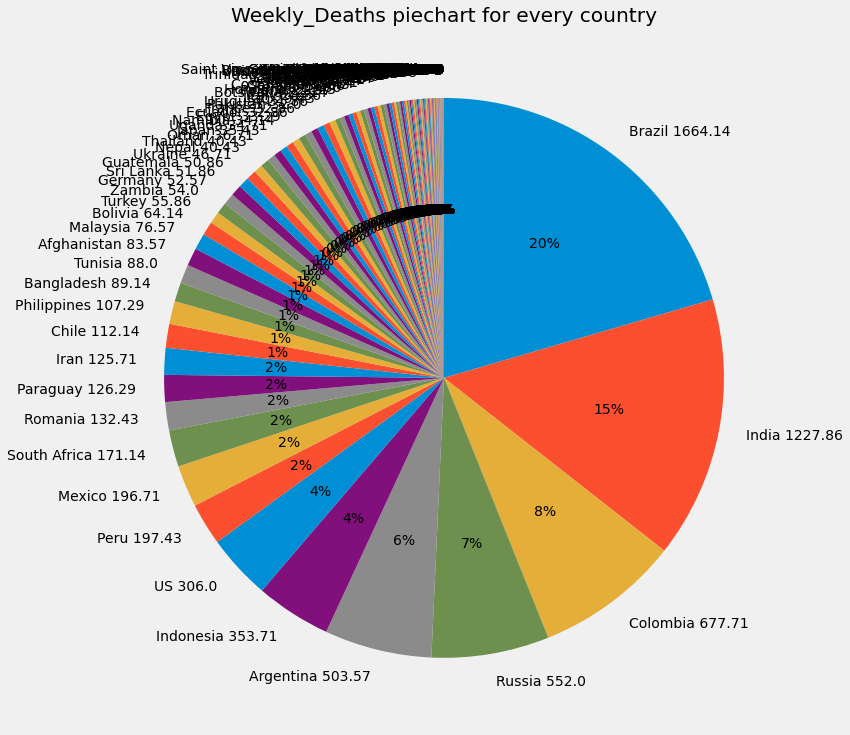

In [36]:
piechart('Weekly_Deaths')

World total:  5948


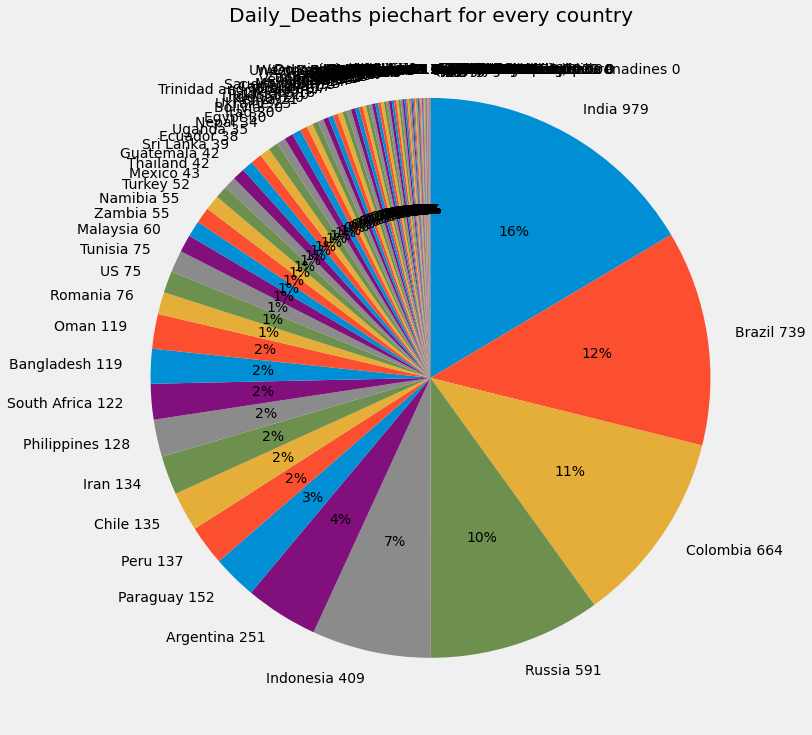

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-06-28


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

784613200.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 181fb22] `date` update
 1 file changed, 2125 insertions(+), 2124 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (68%)


To https://github.com/Arrowheadahp/COVID-19.git
   8ae3aeb..181fb22  master -> master
